# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [0]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)

# Inspecciona su forma y tamaño
# Con el uso de shape y size respecivamente

In [3]:
print('Forma:\n')
print(datos.shape)
print('\nTamaño:\n')
print(datos.size)

Forma:

(5298, 7)

Tamaño:

37086


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

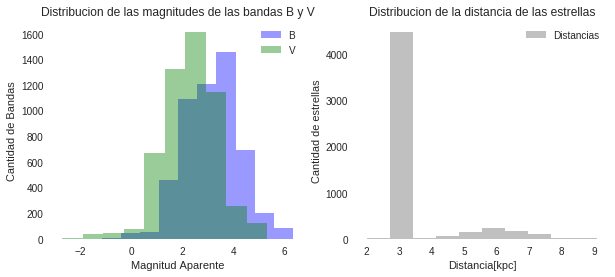

In [116]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline

#Cargar datos

bandasB=datos[:,0].copy()
bandasV=datos[:,1].copy()
bandasR=datos[:,2].copy()
bandasI=datos[:,3].copy()

temperatura=datos[:,4].copy()

masa=datos[:,5].copy()

distancia=datos[:,6].copy()

#Crear figura con dos columnas

fig, ax = plt.subplots(figsize= (10,4), ncols=2)

#Primer gráfico

ax[0].hist(bandasB,color='blue',label='B',alpha=0.4)
ax[0].hist(bandasV,color='green',label='V',alpha=0.4)
ax[0].set_xlabel('Magnitud Aparente')
ax[0].set_ylabel('Cantidad de Bandas')
ax[0].set_title('Distribucion de las magnitudes de las bandas B y V')
ax[0].legend(loc='best')


#Gráfico para ver distancias de sección 3:

ax[1].hist(distancia,color='silver',label='Distancias')
ax[1].set_xlabel('Distancia[kpc]')
ax[1].set_ylabel('Cantidad de estrellas')
ax[1].set_title('Distribucion de la distancia de las estrellas')
ax[1].legend(loc='best')

## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [123]:
#Filtrar por distancia

datos_filtrados = datos[datos[:,6]<=3.5].copy()

#Cantidad de estrellas inicial:
tInicial=datos.shape[0]

#Cantidad de estrellas final:
tFinal=datos_filtrados.shape[0]

print('El set original contenía '+str(tInicial)+' estrellas, luego de filtrar \
quedaron '+str(tFinal))

El set original contenía 5298 estrellas, luego de filtrar quedaron 4506


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)

def mag_abs(mag_ap, dist):
  
    log=np.log10(dist*1000)
    M=mag_ap - 5*log + 5
    
    return M

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

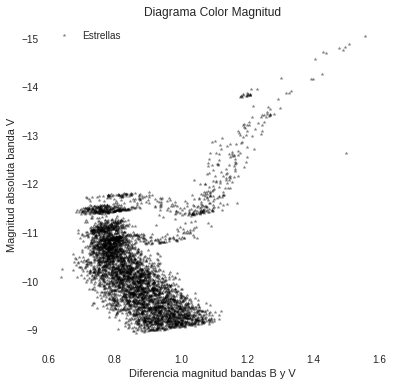

In [165]:
#Crear arrays MV y color

V=np.array(datos_filtrados[:,1].copy())
B=np.array(datos_filtrados[:,0].copy())
dist_filtradas=datos_filtrados[:,6].copy()
color= B - V

MV=mag_abs(V,dist_filtradas)
  

#Definimos tamaño del gráfico
fig, ax=plt.subplots(figsize=(6,6))
ax.plot(color,MV,'*',color='black',markersize=4,alpha=0.5,label='Estrellas')
ax.set_title('Diagrama Color Magnitud')
ax.set_xlabel('Diferencia magnitud bandas B y V')
ax.set_ylabel('Magnitud absoluta banda V')
ax.legend(loc='best')
ax.invert_yaxis() #eje "y" sale invertido en el ejemplo



## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

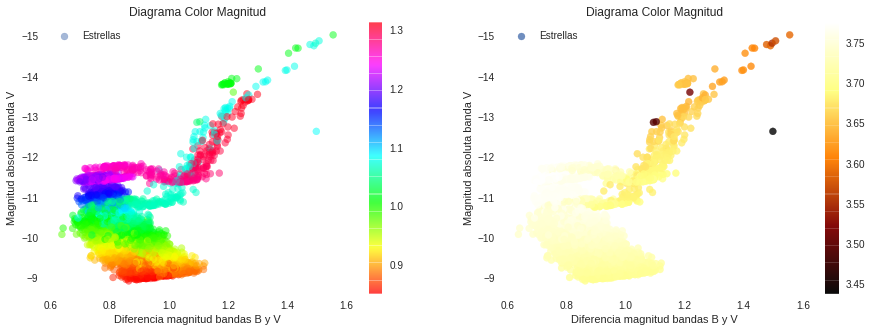

In [191]:
# plot cmd + masa / smd + temp

#Cargamos datos de lista filtrada
masa=np.array(datos_filtrados[:,5].copy())
temp=np.array(datos_filtrados[:,4].copy())

#Creación de la figura
fig, ax=plt.subplots(figsize=(15,5),ncols=2)

#Figura 1
ax[0].invert_yaxis()
cb1=ax[0].scatter(color,MV,label='Estrellas',c=masa,alpha=0.5, cmap='hsv')
fig.colorbar(cb1,ax=ax[0])
ax[0].set_title('Diagrama Color Magnitud')
ax[0].set_xlabel('Diferencia magnitud bandas B y V')
ax[0].set_ylabel('Magnitud absoluta banda V')
ax[0].legend(loc='best')

#Figura 2
ax[1].invert_yaxis()
cb2=ax[1].scatter(color,MV,label='Estrellas',c=temp,alpha=0.8, cmap='afmhot')
fig.colorbar(cb2)
ax[1].set_title('Diagrama Color Magnitud')
ax[1].set_xlabel('Diferencia magnitud bandas B y V')
ax[1].set_ylabel('Magnitud absoluta banda V')
ax[1].legend(loc='best')

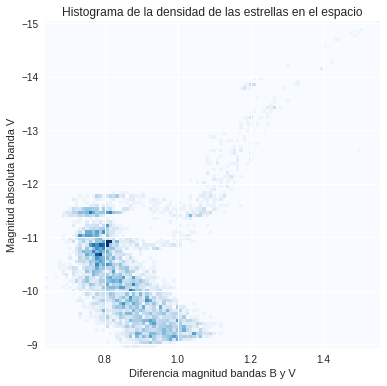

In [200]:
# plot cmd hist2D
fig, ax= plt.subplots(figsize=(6,6))

ax.hist2d(color, MV, bins=100, cmap='Blues') 
#bins entrega la cantidad de divisiones del histograma
ax.invert_yaxis()
ax.set_title('Histograma de la densidad de las estrellas en el espacio')
ax.set_xlabel('Diferencia magnitud bandas B y V')
ax.set_ylabel('Magnitud absoluta banda V')
ax.legend(loc='best')